In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from datetime import datetime, timedelta
from math import floor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
cryptocoins=['BTC-USD' 'ETH-USD' 'LTC-USD' 'XRP-USD' 'ADA-USD' 'DOT-USD' 'BCH-USD'
 'BNB-USD' 'LINK-USD' 'DOGE-USD']

In [ ]:
crypto_names = [i[:-4] for i in cryptocoins]
crypto_names = [i.split('-')[0:10] for i in cryptocoins]

crypto_names

[['BTC',
  'USDETH',
  'USDLTC',
  'USDXRP',
  'USDADA',
  'USDDOT',
  'USDBCH',
  'USDBNB',
  'USDLINK',
  'USDDOGE']]

In [ ]:
# List of 10 cryptocurrency symbols
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'DOGE-USD']

# Loop to download data and generate dataset names
for cryptocurrency in cryptocurrencies:
    # Generate a dataset name based on the cryptocurrency symbol
    base_name = cryptocurrency.split('-')[0]  # 'BTC', 'ETH', etc.

    # Download historical data for the cryptocurrency
    data = yf.download(cryptocurrency, group_by='Ticker', period='max')

    # Generate different datasets for daily, weekly, monthly, quarterly data
    for frequency in ['daily', 'weekly', 'monthly', 'quarterly']:
        name = f'df_{base_name}_{frequency}'  # Create the dataset name
        print(f'Name of our dataset : {name}')

        if frequency == 'daily':
            resampled_data = data
        elif frequency == 'weekly':
            resampled_data = data.resample('W').mean()
        elif frequency == 'monthly':
            resampled_data = data.resample('M').mean()
        elif frequency == 'quarterly':
            resampled_data = data.resample('Q').mean()

        # Store the dataset in the global namespace
        globals()[name] = resampled_data


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BTC_daily
Name of our dataset : df_BTC_weekly
Name of our dataset : df_BTC_monthly
Name of our dataset : df_BTC_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_ETH_daily
Name of our dataset : df_ETH_weekly
Name of our dataset : df_ETH_monthly
Name of our dataset : df_ETH_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_LTC_daily
Name of our dataset : df_LTC_weekly
Name of our dataset : df_LTC_monthly
Name of our dataset : df_LTC_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_XRP_daily
Name of our dataset : df_XRP_weekly
Name of our dataset : df_XRP_monthly
Name of our dataset : df_XRP_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_ADA_daily
Name of our dataset : df_ADA_weekly
Name of our dataset : df_ADA_monthly
Name of our dataset : df_ADA_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_DOT_daily
Name of our dataset : df_DOT_weekly
Name of our dataset : df_DOT_monthly
Name of our dataset : df_DOT_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BCH_daily
Name of our dataset : df_BCH_weekly
Name of our dataset : df_BCH_monthly
Name of our dataset : df_BCH_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BNB_daily
Name of our dataset : df_BNB_weekly
Name of our dataset : df_BNB_monthly
Name of our dataset : df_BNB_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_LINK_daily
Name of our dataset : df_LINK_weekly
Name of our dataset : df_LINK_monthly
Name of our dataset : df_LINK_quarterly


[*********************100%***********************]  1 of 1 completed

Name of our dataset : df_DOGE_daily
Name of our dataset : df_DOGE_weekly
Name of our dataset : df_DOGE_monthly
Name of our dataset : df_DOGE_quarterly


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Combine and preprocess cryptocurrency data
crypto_data = pd.concat(
    [globals()[f'df_{c.split("-")[0]}_daily'][['Close']].rename(columns={'Close': c.split('-')[0]})
     for c in cryptocurrencies], axis=1).T

# Keep the last 365 days and handle missing data
crypto_data = crypto_data.iloc[:, -365:].fillna(crypto_data.mean(axis=1))

# Standardize and apply PCA
crypto_data_scaled = StandardScaler().fit_transform(crypto_data)
crypto_data_pca = PCA(n_components=10).fit_transform(crypto_data_scaled)


In [ ]:
from sklearn.cluster import KMeans
# Apply K-Means clustering to group cryptocurrencies
n_clusters = 4 # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
crypto_data['Cluster'] = kmeans.fit_predict(crypto_data_pca)

# Select one representative cryptocurrency from each cluster
representative_cryptos = [
    crypto_data[crypto_data['Cluster'] == cluster].index[0]
    for cluster in range(n_clusters)
]

# Output the representative cryptocurrencies
print("Representative Cryptocurrencies from each cluster:", representative_cryptos)

Representative Cryptocurrencies from each cluster: ['LTC', 'BTC', 'ETH', 'BCH']


Top-4 Highly Positive Correlations:
   Crypto1 Crypto2  Correlation
6      BTC     ETH     0.950326
9      ETH     BTC     0.950326
7      BTC     BCH     0.864442
13     BCH     BTC     0.864442

Top-4 Highly Negative Correlations:
  Crypto1 Crypto2  Correlation
2     LTC     ETH     0.712689
8     ETH     LTC     0.712689
1     LTC     BTC     0.645457
4     BTC     LTC     0.645457


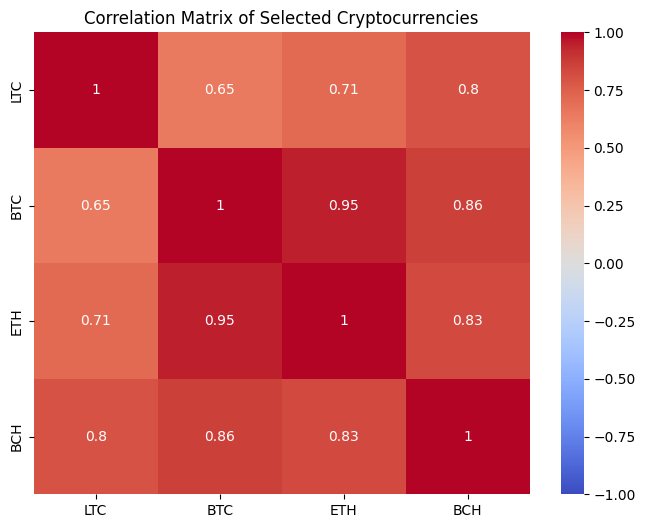

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract data for the selected representative cryptocurrencies and transpose
selected_cryptos_data = crypto_data.loc[representative_cryptos].T

# Calculate the correlation matrix
correlation_matrix = selected_cryptos_data.corr()

# Unstack the correlation matrix to create pairs and remove self-correlations
corr_pairs = correlation_matrix.stack().reset_index()
corr_pairs.columns = ['Crypto1', 'Crypto2', 'Correlation']

# Remove self-correlations (where Crypto1 == Crypto2)
corr_pairs = corr_pairs[corr_pairs['Crypto1'] != corr_pairs['Crypto2']]

# Sort correlations by value
sorted_corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False)

# Select the top 4 positive and top 4 negative correlations
top_4_positive_corr = sorted_corr_pairs.head(4)
top_4_negative_corr = sorted_corr_pairs.tail(4)

# Print the results
print("Top-4 Highly Positive Correlations:")
print(top_4_positive_corr)

print("\nTop-4 Highly Negative Correlations:")
print(top_4_negative_corr)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Cryptocurrencies')
plt.show()


In [ ]:
crypto_data

Date,2023-09-11 00:00:00,2023-09-12 00:00:00,2023-09-13 00:00:00,2023-09-14 00:00:00,2023-09-15 00:00:00,2023-09-16 00:00:00,2023-09-17 00:00:00,2023-09-18 00:00:00,2023-09-19 00:00:00,2023-09-20 00:00:00,...,2024-09-01 00:00:00,2024-09-02 00:00:00,2024-09-03 00:00:00,2024-09-04 00:00:00,2024-09-05 00:00:00,2024-09-06 00:00:00,2024-09-07 00:00:00,2024-09-08 00:00:00,2024-09-09 00:00:00,Cluster
BTC,25162.654297,25833.343750,26228.324219,26539.673828,26608.693359,26568.281250,26534.187500,26754.281250,27211.117188,27132.007812,...,57325.488281,59112.480469,57431.023438,57971.539062,56160.488281,53948.753906,54139.687500,54841.566406,55547.917969,1
ETH,1551.637695,1592.429443,1607.988525,1626.974365,1641.640381,1635.221680,1622.896729,1637.347046,1643.544678,1622.890625,...,2427.902344,2538.187256,2420.603760,2448.977051,2367.737549,2223.876465,2274.107178,2297.292969,2315.618652,2
LTC,58.837158,60.012791,62.003521,62.808537,65.995529,65.339523,63.578228,65.894600,67.334236,64.564346,...,63.526340,65.308998,64.422668,65.427345,66.082581,63.002007,62.086559,60.895454,60.480869,0
XRP,0.474374,0.480738,0.483775,0.489457,0.500875,0.499880,0.493041,0.503203,0.514151,0.521355,...,0.547990,0.567587,0.557391,0.558176,0.544196,0.521347,0.525092,0.529291,0.531492,0
ADA,0.241873,0.245870,0.248884,0.251181,0.250643,0.250436,0.247316,0.251743,0.255260,0.251630,...,0.331740,0.335968,0.318551,0.323524,0.325062,0.314718,0.325073,0.338659,0.341424,0
DOT,3.987120,3.986928,4.002867,4.058726,4.141959,4.185609,4.074598,4.108243,4.156242,4.139903,...,4.073628,4.208609,4.062910,4.109952,4.016058,3.959471,4.076633,4.164106,4.184336,0
BCH,183.909668,198.824432,199.874878,207.906265,217.236465,215.167450,209.763367,217.423828,219.086578,215.496887,...,312.749969,323.729767,309.196808,315.290833,307.468414,294.864868,299.457367,305.216095,312.380005,3
BNB,206.034210,210.994370,212.642593,212.282837,214.175522,214.960541,216.465775,216.003922,217.210953,214.363327,...,512.595215,526.438721,518.668945,507.820496,502.069366,486.902740,493.226135,503.000153,506.285309,3
LINK,5.823768,5.959389,6.021814,6.153503,6.362201,6.283412,6.143583,6.565755,6.863013,6.910942,...,10.372398,10.761755,10.314515,10.335188,10.016020,9.575072,10.018678,10.335867,10.505305,0
DOGE,0.060462,0.060951,0.061280,0.062072,0.062553,0.062148,0.061517,0.062016,0.062709,0.062630,...,0.095354,0.099115,0.096719,0.098025,0.098309,0.092484,0.095261,0.096080,0.098362,0


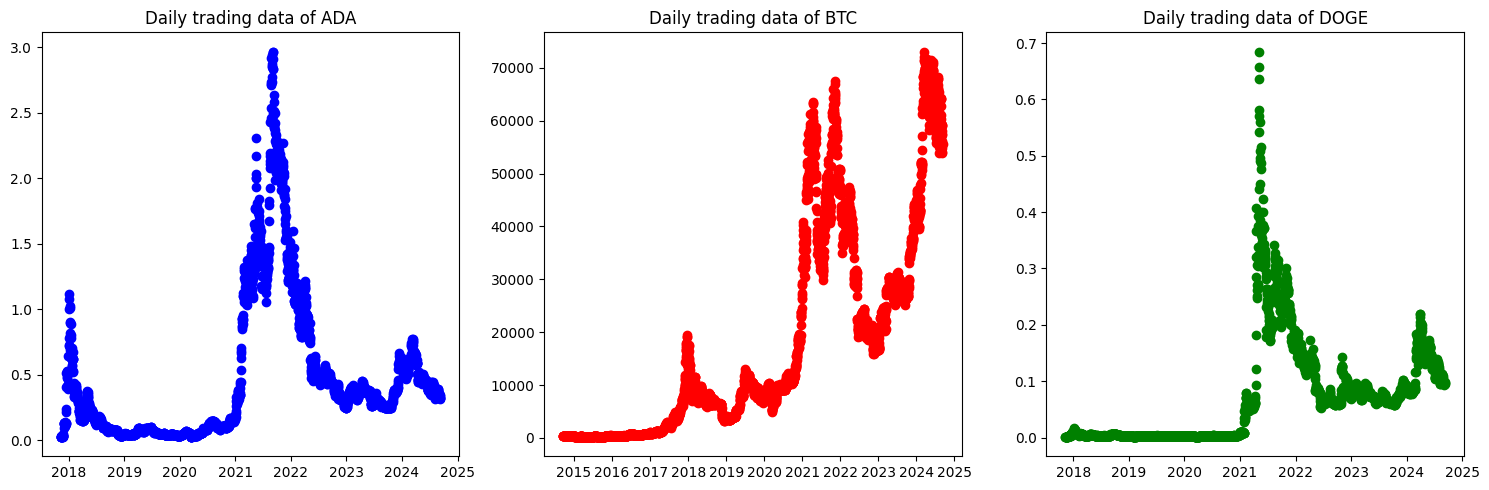

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of cryptocurrencies and corresponding colors
cryptos = ['ADA', 'BTC', 'DOGE']
data_frames = [globals()[f'df_{crypto}_daily'].copy() for crypto in cryptos]
colors = ['blue', 'red', 'green']

# Creating Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, (df, color) in enumerate(zip(data_frames, colors)):
    axes[i].scatter(df.index, df.Close, color=color)
    axes[i].set_title(f'Daily trading data of {cryptos[i]}')

plt.tight_layout()
plt.show()


In [ ]:
# Identifying outliers

def identify_outliers_zscore(name, threshold):
    # Create the dataset name by appending the prefix and suffix to the provided name
    dataset_name = f'df_{name}_daily'

    # Access the 'Close' prices column from the dataset using globals()
    closing_prices = globals()[dataset_name].Close

    # Compute z-scores to determine the number of standard deviations each point is from the mean
    z_scores = np.abs((closing_prices - closing_prices.mean()) / closing_prices.std())

    # Select the data points where the z-score is below the threshold (non-outliers)
    inliers = closing_prices[z_scores < threshold]

    # Select the data points where the z-score exceeds the threshold (outliers)
    outliers = closing_prices[z_scores > threshold]

    # Return the inliers and outliers as two separate series
    return inliers, outliers


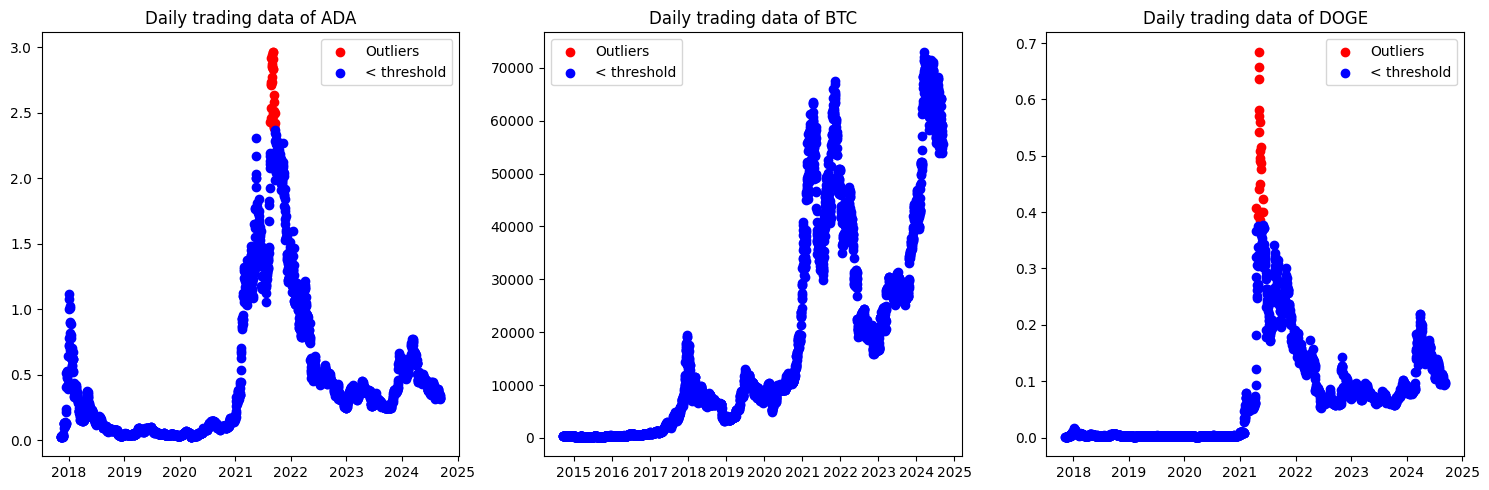

In [ ]:
# Removing Outliers using Z-score
threshold = 3.5
cryptos = ['ADA', 'BTC', 'DOGE']
titles = ['Daily trading data of ADA', 'Daily trading data of BTC', 'Daily trading data of DOGE']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, crypto in enumerate(cryptos):
    filtered_data, outliers = identify_outliers_zscore(crypto, threshold)
    axes[i].scatter(outliers.index, outliers, color='red', label='Outliers')
    axes[i].scatter(filtered_data.index, filtered_data, color='blue', label='< threshold')
    axes[i].set_title(titles[i])
    axes[i].legend()

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Function to transform/replace outliers using z-score
def handle_outliers_zscore(asset_name, zscore_threshold):
    asset_name = f'df_{asset_name}_daily'
    df = globals()[asset_name]
    mean_close = df.Close.mean()
    z_scores = np.abs((df - df.mean()) / df.std())

    for idx in range(len(df)):
        if z_scores.Close.iloc[idx] > zscore_threshold:
            if df.Close.iloc[idx] < 1:
                df.Close.iloc[idx] = mean_close
            else:
                df.Close.iloc[idx] = (df.Close.iloc[idx])**(1/3)

    return df

zscore_threshold = 3.5
for asset in ['ADA', 'BTC', 'DOGE']:
    globals()[f'df_{asset}_daily'] = handle_outliers_zscore(asset, zscore_threshold)


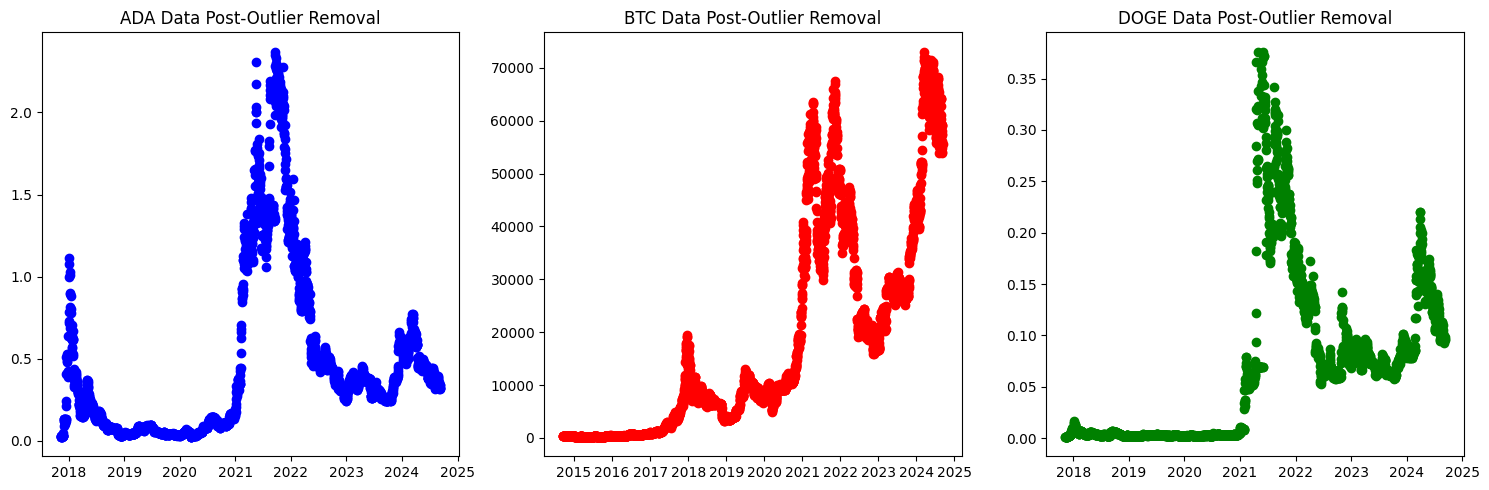

In [ ]:
#Creating a 3-panel plot to visualize the daily closing prices of XRP, USDC, and BUSD after removing outliers.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot XRP data
axes[0].scatter(df_ADA_daily.index, df_ADA_daily.Close, color='blue')
axes[0].set_title('ADA Data Post-Outlier Removal')

# Plot USDC data
axes[1].scatter(df_BTC_daily.index, df_BTC_daily.Close, color='red')
axes[1].set_title('BTC Data Post-Outlier Removal')

# Plot BUSD data
axes[2].scatter(df_DOGE_daily.index, df_DOGE_daily.Close, color='green')
axes[2].set_title('DOGE Data Post-Outlier Removal')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
def check_dataframe(df, frequency):
    # Resample the data based on the specified frequency and calculate the average for each period
    df_resampled = df.resample(frequency).mean()

    # Check if the last date in the resampled DataFrame is beyond the last date in the original DataFrame
    if df_resampled.index[-1] > df.index[-1]:
        # If it is, remove the last row from the resampled DataFrame
        return df_resampled.iloc[:-1]
    else:
        # If not, return the resampled DataFrame without changes
        return df_resampled


In [ ]:
# # Initialize lists to store the resampled DataFrames
# weekly_dfs, monthly_dfs, quarterly_dfs = [], [], []

# # Loop through each cryptocurrency name
# for name in crypto_names:
#     # Replace hyphens with underscores to match the DataFrame naming convention
#     clean_name = name.replace('-', '_')

#     # Access the daily DataFrame dynamically
#     df = globals().get(f'df_{clean_name}_daily')

#     if df is None:
#         print(f"DataFrame for {name} not found in globals.")
#         continue  # Skip to the next iteration if not found

#     # Resample to weekly frequency and store in the global namespace
#     new_name_weekly = f'df_{clean_name}_weekly'
#     globals()[new_name_weekly] = check_dataframe(df, 'W')
#     weekly_dfs.append(globals()[new_name_weekly])

#     # Resample to monthly frequency and store in the global namespace
#     new_name_monthly = f'df_{clean_name}_monthly'
#     globals()[new_name_monthly] = check_dataframe(df, 'M')
#     monthly_dfs.append(globals()[new_name_monthly])

#     # Resample to quarterly frequency and store in the global namespace
#     new_name_quarterly = f'df_{clean_name}_quarterly'
#     globals()[new_name_quarterly] = check_dataframe(df, 'Q')
#     quarterly_dfs.append(globals()[new_name_quarterly])

# Define your cryptocoins correctly
cryptocoins = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'DOGE-USD']

# Extract the coin names without the '-USD'
crypto_names = [i.split('-')[0] for i in cryptocoins]

# Initialize lists to store the resampled DataFrames
weekly_dfs, monthly_dfs, quarterly_dfs = [], [], []

# Loop through each cryptocurrency name
for name in crypto_names:
    df_name = f'df_{name}_daily'  # Construct the DataFrame name
    df = globals().get(df_name)  # Access the DataFrame from globals()

    if df is None:
        print(f"DataFrame for {df_name} not found in globals.")
        continue  # Skip to the next iteration if not found

    # Resample to weekly frequency and store in the global namespace
    new_name_weekly = f'df_{name}_weekly'
    globals()[new_name_weekly] = check_dataframe(df, 'W')
    weekly_dfs.append(globals()[new_name_weekly])

    # Resample to monthly frequency and store in the global namespace
    new_name_monthly = f'df_{name}_monthly'
    globals()[new_name_monthly] = check_dataframe(df, 'M')
    monthly_dfs.append(globals()[new_name_monthly])

    # Resample to quarterly frequency and store in the global namespace
    new_name_quarterly = f'df_{name}_quarterly'
    globals()[new_name_quarterly] = check_dataframe(df, 'Q')
    quarterly_dfs.append(globals()[new_name_quarterly])



In [ ]:
missing_values_count = 0

# Loop through each cryptocurrency name
for name in crypto_names:
    # Replace hyphens with underscores to match the DataFrame naming convention
    clean_name = name.replace('-', '_')

    # Access the daily DataFrame dynamically
    df = globals().get(f'df_{clean_name}_daily')

    if df is None:
        print(f"DataFrame for {name} not found in globals.")
        continue

    # Calculate the total number of missing values in the DataFrame
    total_missing = df.isnull().sum().sum()

    if total_missing != 0:
        missing_values_count += 1
        print(f'{name} has {total_missing} missing values')

# Check if there were any missing values in any DataFrame
if missing_values_count == 0:
    print("No null values in any of the datasets.")


No null values in any of the datasets.


In [ ]:
start_dates, end_dates = [], []
shapes, na_counts = [], []

# Create a list of cryptocurrency names
crypto_names = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

# Collect metadata for each cryptocurrency's DataFrame
for name in crypto_names:
    # Use globals() instead of locals() to access DataFrames from the global namespace
    df = globals()[f'df_{name.replace("-", "_")}_daily']
    start_dates.append(df.index[0])
    end_dates.append(df.index[-1])
    shapes.append(df.shape)
    na_counts.append(df.isnull().sum().sum())

# Create a DataFrame to summarize the metadata
metadata_df = pd.DataFrame({
    'Name': crypto_names,
    'Shape': shapes,
    'NA Count': na_counts,
    'Start Date': start_dates,
    'End Date': end_dates,
})

# Print and display the metadata DataFrame
print('Daily data:')
metadata_df

Daily data:


,Name,Shape,NA Count,Start Date,End Date
0,BTC,"(3646, 6)",0,2014-09-17,2024-09-09
1,ETH,"(2497, 6)",0,2017-11-09,2024-09-09
2,LTC,"(3646, 6)",0,2014-09-17,2024-09-09
3,XRP,"(2497, 6)",0,2017-11-09,2024-09-09
4,ADA,"(2497, 6)",0,2017-11-09,2024-09-09
5,DOT,"(1482, 6)",0,2020-08-20,2024-09-09
6,BCH,"(2497, 6)",0,2017-11-09,2024-09-09
7,BNB,"(2497, 6)",0,2017-11-09,2024-09-09
8,LINK,"(2497, 6)",0,2017-11-09,2024-09-09
9,DOGE,"(2497, 6)",0,2017-11-09,2024-09-09


In [ ]:
freq = 'weekly'
coin = 'BTC'
name = f'df_{coin}_{freq}'
dataframe = globals()[name]
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02
mean,17696.427186,18098.498177,17265.594028,17710.176156,17710.176156,1.757585e+10
std,19529.455842,19971.220236,19046.380759,19538.366203,19538.366203,1.778810e+10
min,221.612146,227.142142,203.237858,214.185710,214.185710,1.152565e+07
25%,1148.082851,1171.487113,1123.413557,1145.732579,1145.732579,2.932341e+08
50%,9148.271763,9288.941127,9047.362723,9186.877511,9186.877511,1.508438e+10
75%,28902.577288,29491.339565,28485.233259,29199.222377,29199.222377,2.850626e+10
max,70257.695312,72044.719866,69077.593750,70170.686384,70170.686384,1.095257e+11


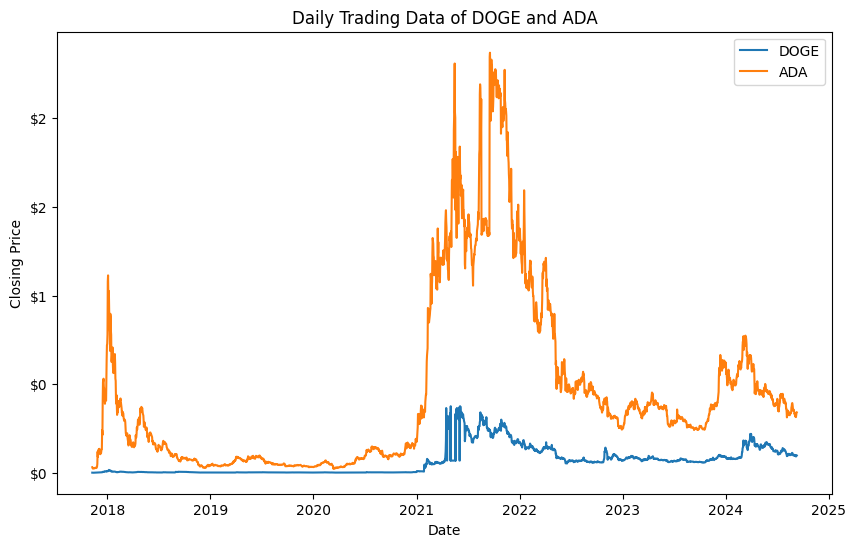

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the frequency and the specific cryptocurrencies
freq = 'daily'
cryptos_to_plot = ['DOGE', 'ADA']

# Set up the plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visibility
plt.title(f'{freq.capitalize()} Trading Data of DOGE and ADA')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Loop through DOGE and ADA to plot their daily closing prices
for crypto in cryptos_to_plot:
    data = globals().get(f'df_{crypto}_{freq}')

    if data is not None:
        plt.plot(data.index, data['Close'], label=crypto)
    else:
        print(f"Data for {crypto} not found.")

# Set y-axis to display real-world values
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()


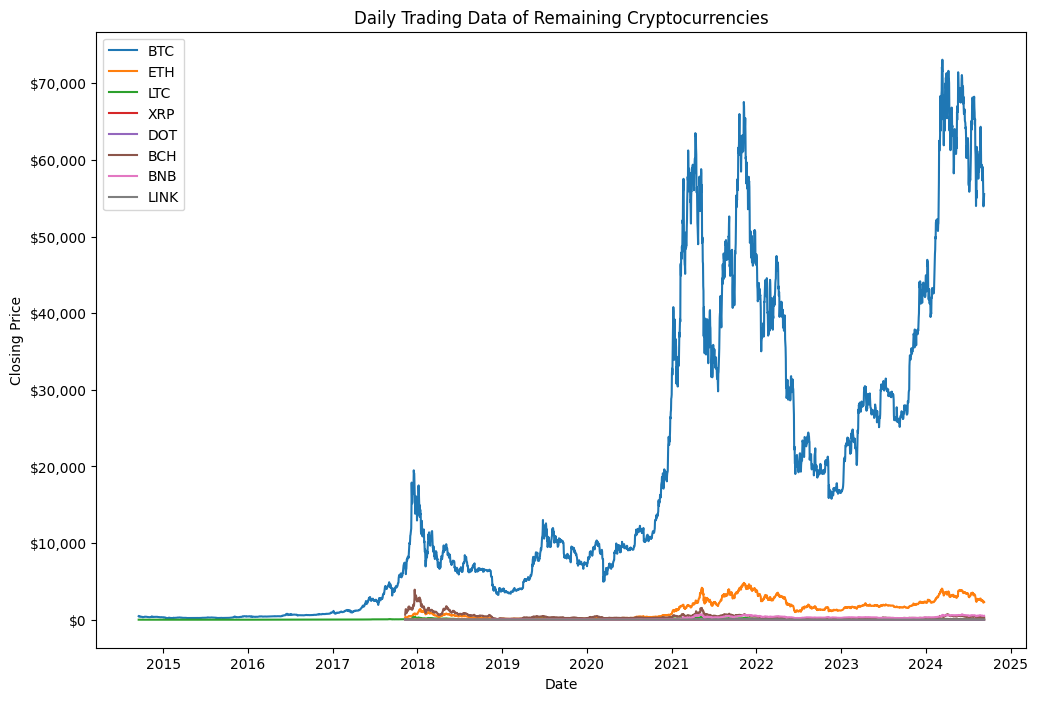

In [ ]:
# Define the frequency and the specific cryptocurrencies to exclude DOGE and ADA
freq = 'daily'
cryptos_to_plot = [crypto for crypto in crypto_names if crypto not in ['DOGE', 'ADA']]

# Set up the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
plt.title(f'{freq.capitalize()} Trading Data of Remaining Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Loop through the remaining cryptocurrencies to plot their daily closing prices
for crypto in cryptos_to_plot:
    data = globals().get(f'df_{crypto.replace("-", "_")}_{freq}')

    if data is not None:
        plt.plot(data.index, data['Close'], label=crypto)
    else:
        print(f"Data for {crypto} not found.")

# Set y-axis to display real-world values
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.legend()
plt.show()


**TRAIN AND TEST**



In [ ]:
def train_test_split(crypto, freq):
    data = globals()[f'df_{crypto}_{freq}']
    split_index = floor(0.7 * len(data))
    train_data = data[:split_index]
    test_data = data[split_index:]
    return train_data, test_data


Using ARIMA for forecasting

In [ ]:
# Splitting DOGE daily data into training and testing sets
freq = 'weekly'
coin = 'DOGE'
train_data2, test_data2 = train_test_split(coin, freq)

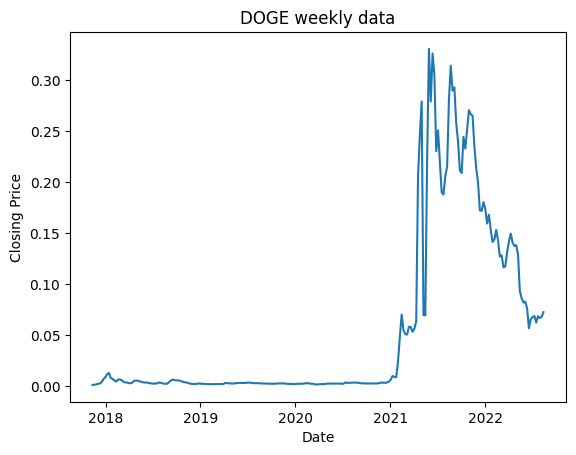

In [ ]:
# Plotting BTC weekly closing prices for training data.
plt.title(f'{coin} {freq} data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_data2.Close)
plt.show()

In [ ]:
differentdate_df = (train_data2.Close - train_data2.Close.shift(1)).dropna()
differentdate_df.head()

,Close
Date,
2017-11-19,0.000108
2017-11-26,0.000474
2017-12-03,0.000361
2017-12-10,0.000463
2017-12-17,0.001526


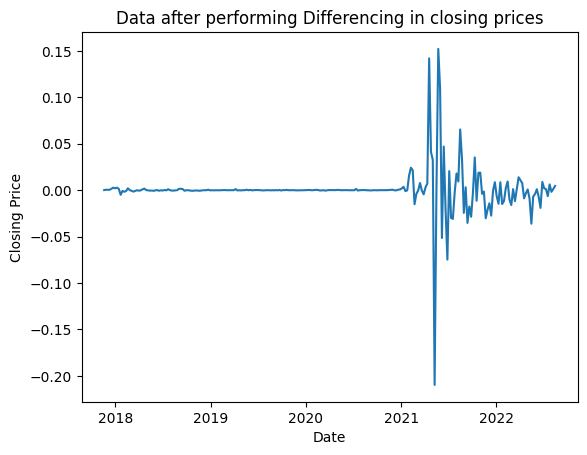

In [ ]:
# Plottinging the first differences of BTC weekly closing prices.
plt.title('Data after performing Differencing in closing prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(differentdate_df)
plt.show()

choosing p,d,q value for arima model


In [ ]:
# p-value from Dickey-Fuller test for stationarity
print("Dickey–Fuller test:: p=%f" % adfuller(train_data2.Close.iloc[:])[1])
print("Dickey–Fuller test:: p=%f" % adfuller(differentdate_df.iloc[:])[1])

Dickey–Fuller test:: p=0.505218
Dickey–Fuller test:: p=0.001772


**Selecting the model**


In [ ]:
# Selecting the best ARIMA model parameters based on AIC
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Define parameter ranges
p_range = range(0, 5)
d_value = 1  # Differencing once due to p-value < 0.05
q_range = range(0, 5)

# Initialize variables to track the best model
best_aic = float("inf")
best_params = None
best_arima_model = None

# Generate all possible combinations of p and q
param_combinations = list(product(p_range, q_range))

# Iterate over each combination of parameters
for (p, q) in param_combinations:
    try:
        # Fit the ARIMA model
        arima_model = ARIMA(train_data2.Close, order=(p, d_value, q)).fit()
    except ValueError:
        print(f'Invalid parameter combination: (p={p}, q={q})')
        continue

    # Calculate the AIC of the model
    model_aic = arima_model.aic

    # Update the best model if the current one has a lower AIC
    if model_aic < best_aic:
        best_aic = model_aic
        best_params = (p, q)
        best_arima_model = arima_model

    print(f'Parameters: (p={p}, q={q})\tAIC: {model_aic}')

print(f'\nBest parameters: {best_params}\tLowest AIC: {best_aic}')
print(best_arima_model.summary())


Parameters: (p=0, q=0)	AIC: -1160.011340508971
Parameters: (p=0, q=1)	AIC: -1163.8959346186334
Parameters: (p=0, q=2)	AIC: -1177.3915795411162
Parameters: (p=0, q=3)	AIC: -1194.600007892795
Parameters: (p=0, q=4)	AIC: -1200.6415548445802
Parameters: (p=1, q=0)	AIC: -1161.0515505080768
Parameters: (p=1, q=1)	AIC: -1164.143688148094
Parameters: (p=1, q=2)	AIC: -1184.463380497638
Parameters: (p=1, q=3)	AIC: -1203.8263485823422
Parameters: (p=1, q=4)	AIC: -1198.7527463996398
Parameters: (p=2, q=0)	AIC: -1182.1730995789553
Parameters: (p=2, q=1)	AIC: -1193.1826895062595
Parameters: (p=2, q=2)	AIC: -1191.6102879694151
Parameters: (p=2, q=3)	AIC: -1202.3860955673708
Parameters: (p=2, q=4)	AIC: -1201.2814595087082
Parameters: (p=3, q=0)	AIC: -1191.7609972258333
Parameters: (p=3, q=1)	AIC: -1191.6903133905328
Parameters: (p=3, q=2)	AIC: -1191.7324373799652
Parameters: (p=3, q=3)	AIC: -1198.2583788515858
Parameters: (p=3, q=4)	AIC: -1199.6909529582583
Parameters: (p=4, q=0)	AIC: -1190.0981017290

In [ ]:
# Fit the ARIMA model with specific parameters (p=35, d=1, q=15)
best_arima_model = ARIMA(train_data2.Close, order=(35, 1, 15)).fit()

# Print the summary of the fitted model
print(best_arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  249
Model:               ARIMA(35, 1, 15)   Log Likelihood                 625.045
Date:                Mon, 09 Sep 2024   AIC                          -1148.090
Time:                        13:24:45   BIC                           -968.905
Sample:                    11-12-2017   HQIC                         -1075.957
                         - 08-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0376     87.261      0.000      1.000    -170.990     171.065
ar.L2         -0.1786     64.613     -0.003      0.998    -126.817     126.460
ar.L3         -0.1685     63.544     -0.003      0.9

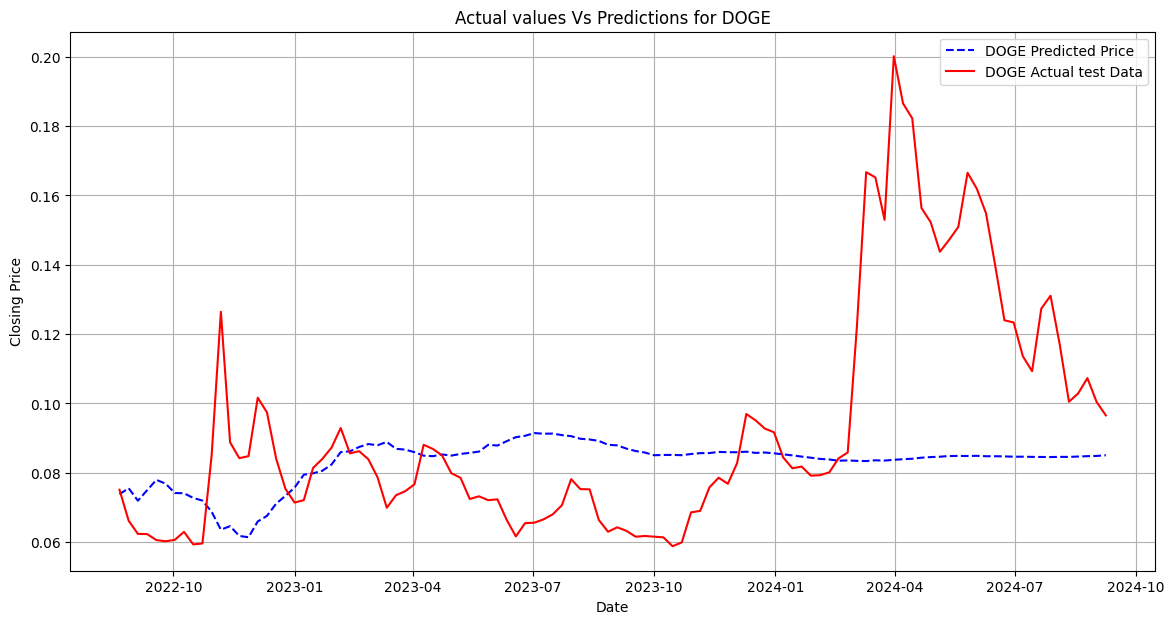

In [ ]:

# Generating predictions and plotting actual vs predicted closing prices for DOGE

# Extracting start and end dates from the testing data
start_date = test_data2.index[0]
end_date = test_data2.index[-1]

# Generating predictions for DOGE
doge_predictions = best_arima_model.predict(start=start_date, end=end_date)

# Plotting actual vs predicted closing prices
plt.figure(figsize=(14, 7))
plt.grid(True)
plt.title('Actual values Vs Predictions for DOGE')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(doge_predictions, color='blue', linestyle='dashed', label='DOGE Predicted Price')
plt.plot(test_data2.Close, color='red', label='DOGE Actual test Data')
plt.legend()
plt.show()


In [ ]:
# Calculating the MAE
mae = mean_absolute_error(test_data2.Close, doge_predictions)

# Calculating the MSE
mse = mean_squared_error(test_data2.Close, doge_predictions)

# Calculating the RMSE
rmse = np.sqrt(mse)

# Printing the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.024385992213523708
Mean Squared Error (MSE): 0.0012068170879619095
Root Mean Squared Error (RMSE): 0.034739272991268964


In [ ]:
from pmdarima import auto_arima

# Fit the best SARIMA model to the training data
best_sarima_model = auto_arima(
    train_data2.Close,
    seasonal=True,
    m=52,  # Assuming weekly data, so 52 weeks in a year
    stepwise=True,
    suppress_warnings=True,
    trace=True  # Set to True if you want to see the model fitting process
)

# Print the summary of the best model
print(best_sarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=-1185.988, Time=21.39 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-1158.049, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=-1157.102, Time=3.30 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=-1159.956, Time=6.59 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=-1160.011, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=-1187.845, Time=8.49 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=-1189.700, Time=0.72 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=-1187.991, Time=18.20 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=-1182.579, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=-1191.301, Time=2.44 sec
 ARIMA(2,1,1)(1,0,0)[52] intercept   : AIC=-1186.896, Time=5.70 sec
 ARIMA(2,1,1)(0,0,1)[52] intercept   : AIC=-1189.614, Time=18.94 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=-1187.599, Time=16.08 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=-1162.250, Time=2.03 sec
 

In [ ]:
!pip install pmdarima


In [ ]:
def train_test_split(coin, freq):
    name = f'df_{coin}_{freq}'  # This constructs the DataFrame name based on the coin and frequency
    dataframe = globals()[name]  # Access the DataFrame from the globals()
    split_row = floor(0.7 * dataframe.shape[0])  # Calculate the split index for 70% training data
    training_data = dataframe[:split_row]  # Training data
    testing_data = dataframe[split_row:]  # Testing data
    return training_data, testing_data


In [ ]:
def train_test_split(crypto, freq):
    # Construct the DataFrame name based on the cryptocurrency and frequency
    df_name = f'df_{crypto.replace("-", "_")}_{freq}'

    # Access the DataFrame from the global namespace
    df = globals().get(df_name)

    if df is None:
        print(f"DataFrame for {df_name} not found in globals.")
        return None, None

    # Split the data into training and testing sets
    split_index = floor(0.7 * len(df))
    train_data = df[:split_index]
    test_data = df[split_index:]

    return train_data, test_data

In [ ]:
from pmdarima import auto_arima
from math import floor
import warnings

# Suppress warnings to keep the output clean
warnings.filterwarnings("ignore")

# List of cryptocurrencies
cryptocurrencies = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

# Dictionary to store the best ARIMA parameters for each cryptocurrency
best_arima_params = {}

# Frequency of data
freq = 'weekly'

# Iterate over each cryptocurrency
for crypto in cryptocurrencies:
    try:
        # Fetch the training data for the current cryptocurrency
        train_data, _ = train_test_split(crypto, freq)  # Use the correct function to get training data

        if train_data is None or train_data.empty:
            print(f"No training data found for {crypto}. Skipping...")
            continue

        print(f"Finding best ARIMA model for {crypto}...")

        # Fit the best ARIMA model using auto_arima
        best_arima_model = auto_arima(
            train_data['Close'],
            seasonal=False,  # Set to False if you do not expect seasonality
            stepwise=True,
            suppress_warnings=True,
            trace=True
        )

        # Store the best (p, d, q) values for this cryptocurrency
        best_arima_params[crypto] = best_arima_model.order  # This gives you (p, d, q)

        # Print the best model parameters and summary
        print(f"Best ARIMA model for {crypto}: (p, d, q) = {best_arima_params[crypto]}")
        print(best_arima_model.summary())
        print("\n" + "=" * 50 + "\n")

    except Exception as e:
        print(f"Error processing {crypto}: {str(e)}")

# After running the loop, print out the best parameters for all cryptocurrencies
print("Best ARIMA parameters for all cryptocurrencies:")
print(best_arima_params)


Finding best ARIMA model for BTC...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6339.859, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6370.555, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6352.401, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6349.450, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6371.247, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6353.331, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6352.426, Time=2.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6331.958, Time=4.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6342.908, Time=3.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6329.924, Time=4.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6330.792, Time=1.77 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=6331.923, Time=3.16 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6331.916, Time=5.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6328.963, Time=6.23 s

In [ ]:
# Fit the ARIMA model with specified parameters (p=5, d=1, q=5) and exogenous variable 'Open'
arima_model_with_exog = ARIMA(train_data2.Close, order=(5, 1, 5), exog=train_data2['Open']).fit()

# Print the summary of the fitted model
print(arima_model_with_exog.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  249
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 609.877
Date:                Mon, 09 Sep 2024   AIC                          -1195.755
Time:                        13:30:14   BIC                          -1153.594
Sample:                    11-12-2017   HQIC                         -1178.782
                         - 08-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.0256      0.022     -1.150      0.250      -0.069       0.018
ar.L1         -0.0730      0.665     -0.110      0.913      -1.377       1.231
ar.L2         -0.1901      0.509     -0.374      0.7

**Facebook prophet**

In [ ]:
!pip install prophet


In [ ]:
from math import floor

def prepare_data_for_prophet(coin, freq):
    # Construct the name of the DataFrame based on the coin and frequency
    df_name = f'df_{coin}_{freq}'

    # Access the DataFrame from globals, reset index, and select 'Date' and 'Close' columns
    data = globals()[df_name].reset_index()[['Date', 'Close']]

    # Rename columns to match Prophet's expected format
    data.columns = ['ds', 'y']

    # Splitting the data into training (70%), cross-validation (10%), and testing (20%)
    split_row_train = floor(0.7 * data.shape[0])
    split_row_cv = floor(0.8 * data.shape[0])  # 70% train + 10% CV

    # Train, cross-validation, and test split
    train_data = data.iloc[:split_row_train]
    cv_data = data.iloc[split_row_train:split_row_cv]
    test_data = data.iloc[split_row_cv:]

    # Print the shapes of the datasets
    print(f'Training data shape: {train_data.shape}')
    print(f'Cross-validation data shape: {cv_data.shape}')
    print(f'Testing data shape: {test_data.shape}')

    return train_data, cv_data, test_data

# Example usage
coin = 'BTC'
freq = 'daily'

train_data, cv_data, test_data = prepare_data_for_prophet(coin, freq)


Training data shape: (2552, 2)
Cross-validation data shape: (364, 2)
Testing data shape: (730, 2)


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

def train_prophet_model(training_set):
    prophet_model = Prophet()
    prophet_model.fit(training_set)
    return prophet_model

def generate_prophet_forecast(fitted_model, num_periods, frequency):
    future_dates = fitted_model.make_future_dataframe(periods=num_periods, freq=frequency)
    predictions = fitted_model.predict(future_dates)
    return predictions

def assess_prophet_performance(val_data, test_set, predictions):
    val_predictions = predictions.set_index('ds').loc[val_data['ds'], 'yhat'].values
    test_predictions = predictions.set_index('ds').loc[test_set['ds'], 'yhat'].values

    val_mae = mean_absolute_error(val_data['y'], val_predictions)
    test_mae = mean_absolute_error(test_set['y'], test_predictions)

    print(f'Validation MAE: {val_mae}')
    print(f'Testing MAE: {test_mae}')

prophet_model = train_prophet_model(train_data)

prophet_forecast = generate_prophet_forecast(prophet_model, num_periods=len(cv_data) + len(test_data), frequency='D')

assess_prophet_performance(cv_data, test_data, prophet_forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp861ikrrs/uxu_glev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp861ikrrs/lct7fsyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86135', 'data', 'file=/tmp/tmp861ikrrs/uxu_glev.json', 'init=/tmp/tmp861ikrrs/lct7fsyv.json', 'output', 'file=/tmp/tmp861ikrrs/prophet_model56g7p5wc/prophet_model-20240909133029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Validation MAE: 32244.26679148696
Testing MAE: 83430.19212883062


**LSTM**

In [ ]:
# # from math import floor
# # import numpy as np
# # from sklearn.preprocessing import MinMaxScaler

# # def train_cv_test_split_lstm(coin, freq):
# #     name = f'df_{coin}_{freq}'
# #     data = globals()[name]
# #     scaler = MinMaxScaler()
# #     data['scaled_close'] = scaler.fit_transform(np.array(data.Close).reshape(-1,1))

# #     train_end = floor(0.7 * data.shape[0])
# #     cv_end = floor(train_end + 0.1 * data.shape[0])

# #     train_data = data.scaled_close.iloc[:train_end]
# #     cv_data = data.scaled_close.iloc[train_end:cv_end]
# #     test_data = data.scaled_close.iloc[cv_end:]

# #     # print(f'Training data shape: {train_data.shape}')
# #     # print(f'Cross-validation data shape: {cv_data.shape}')
# #     # print(f'Testing data shape: {test_data.shape}')

# #     return data, train_data, cv_data, test_data, scaler

# # def prepare_cv_data(data, time_steps, split_sizes):
# #     start_idx = split_sizes[0] - time_steps
# #     X_cv, y_cv = [], []

# #     for i in range(start_idx, start_idx + split_sizes[1]):
# #         temp_seq = data.scaled_close.iloc[i:(i+time_steps)]
# #         X_cv.append(temp_seq)
# #         y_cv.append(data.scaled_close.iloc[i+time_steps])

# #     return np.array(X_cv), np.array(y_cv)

# # def prepare_test_data(data, time_steps, split_sizes):
# #     start_idx = split_sizes[0] + split_sizes[1] - time_steps - 1
# #     X_test, y_test = [], []

# #     for i in range(start_idx, start_idx + split_sizes[2]):
# #         temp_seq = data.scaled_close.iloc[i:(i+time_steps)]
# #         X_test.append(temp_seq)
# #         y_test.append(data.scaled_close.iloc[i+time_steps])

# #     return np.array(X_test), np.array(y_test)
# from math import floor
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

def train_cv_test_split_lstm(coin, freq):
    name = f'df_{coin}_{freq}'
    data = globals()[name]
    scaler = MinMaxScaler()
    data['scaled_close'] = scaler.fit_transform(np.array(data.Close).reshape(-1,1))

    train_end = floor(0.7 * data.shape[0])
    cv_end = floor(train_end + 0.1 * data.shape[0])

    train_data = data.scaled_close.iloc[:train_end]
    cv_data = data.scaled_close.iloc[train_end:cv_end]
    test_data = data.scaled_close.iloc[cv_end:]

    return data, train_data, cv_data, test_data, scaler

def prepare_cv_data(data, time_steps, split_sizes):
    start_idx = split_sizes[0] - time_steps
    X_cv, y_cv = [], []

    for i in range(start_idx, start_idx + split_sizes[1]):
        temp_seq = data.scaled_close.iloc[i:(i+time_steps)]
        X_cv.append(temp_seq)
        y_cv.append(data.scaled_close.iloc[i+time_steps])

    return np.array(X_cv), np.array(y_cv)

def prepare_test_data(data, time_steps, split_sizes):
    start_idx = split_sizes[0] + split_sizes[1] - time_steps - 1
    X_test, y_test = [], []

    for i in range(start_idx, start_idx + split_sizes[2]):
        temp_seq = data.scaled_close.iloc[i:(i+time_steps)]
        X_test.append(temp_seq)
        y_test.append(data.scaled_close.iloc[i+time_steps])

    return np.array(X_test), np.array(y_test)

def prepare_train_data(scaled_data, time_steps, train_size):
    X_train, y_train = [], []

    for i in range(train_size - time_steps):
        temp_seq = scaled_data[i:(i + time_steps)]
        X_train.append(temp_seq)
        y_train.append(scaled_data[i + time_steps])

    return np.array(X_train), np.array(y_train)
# Define the coin and frequency
coin = 'BTC'
freq = 'daily'

# Get the split data
data, train_data, cv_data, test_data, scaler = train_cv_test_split_lstm(coin, freq)

# Set the number of time steps
time_steps = 10

In [ ]:
# # Splitting the input data into sequences of specified time steps for training.
# def prepare_train_data(scaled_data, time_steps, train_size):
#     X_train, y_train = [], []

#     for i in range(train_size - time_steps):
#         temp_seq = scaled_data[i:(i + time_steps)]
#         X_train.append(temp_seq)
#         y_train.append(scaled_data[i + time_steps])

#     return np.array(X_train), np.array(y_train)
# Prepare the data for LSTM model
train_size = len(train_data)
cv_size = len(cv_data)
test_size = len(test_data)

split_sizes = [train_size, cv_size, test_size]

X_train, y_train = prepare_train_data(train_data, time_steps, train_size)
X_cv, y_cv = prepare_cv_data(data, time_steps, split_sizes)
X_test, y_test = prepare_test_data(data, time_steps, split_sizes)



In [ ]:
# # Splitting the data into sequences for testing based on specified time steps.
# def split_data_test(data1, time_steps, sizes):
#     start_index = sizes[0] + sizes[1] - time_steps
#     X_data, y_data = [], []
#     for i in range(start_index, start_index + sizes[2]):
#         temp = data1.mms_close.iloc[i:(i + time_steps)]
#         X_data.append(temp)
#         y_data.append(data1.mms_close.iloc[i + time_steps])
#     return np.array(X_data), np.array(y_data)
# train_cv_test_split_lstm(coin, freq)
# Reshape input data to 3D [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_cv = X_cv.reshape((X_cv.shape[0], X_cv.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(150, return_sequences=True, input_shape=(time_steps, 1)),  # First LSTM layer
    LSTM(100),  # Second LSTM layer
    Dense(1),  # Output layer for regression
])

In [ ]:

# # Set the number of time steps
# time_steps = 10

# # Define the LSTM model
# model = Sequential([
#     LSTM(150, return_sequences=True, input_shape=(time_steps, 1)),  # First LSTM layer
#     LSTM(100),  # Second LSTM layer
#     Dense(1),  # Output layer for regression
# ])

# # Compile the model with Adam optimizer and MSE loss
# model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')
# model.summary()
# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 150)             │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,701 (748.83 KB)

 Trainable params: 191,701 (748.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # # Training the LSTM model on the training data with validation, specifying epochs, batch size, and verbosity level
# model.fit(X_train, y_train, validation_data = (X_cv, y_cv), epochs = 30, batch_size = 64, verbose = 1)
# # Splitting the data into training, cross-validation, and testing sets
# data, train_data, cv_data, test_data, scaler = train_cv_test_split_lstm(coin, freq)

# # Preparing the training data
# X_train, y_train = prepare_train_data(train_data, time_steps, len(train_data))

# # Preparing the cross-validation data
# X_cv, y_cv = prepare_cv_data(data, time_steps, [len(train_data), len(cv_data), len(test_data)])

# # Training the LSTM model on the training data with validation, specifying epochs, batch size, and verbosity level
# model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=30, batch_size=64, verbose=1)
# Training the LSTM model
model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=30, batch_size=64, verbose=1)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - loss: 0.0152 - val_loss: 0.0029
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 3.7649e-04 - val_loss: 0.0015
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 3.9330e-04 - val_loss: 0.0018
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 3.1670e-04 - val_loss: 0.0016
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 4.6785e-04 - val_loss: 0.0017
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 3.3705e-04 - val_loss: 0.0013
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 2.8555e-04 - val_loss: 0.0016
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.7471e-04 - val_loss: 0.0017
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 4.0151e-04 - val_loss: 0.0012
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.2431e-04 - val_loss: 0.0014
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.2216e-04 - val_loss: 0.0015
Epoch 12/30
40/40

In [ ]:
# #Using the learnt model to predict and inversely transform the scaled training, cross-validation, and testing data
# train_predict = scaler.inverse_transform(model.predict(X_train))
# cv_predict = scaler.inverse_transform(model.predict(X_cv))
# test_predict = scaler.inverse_transform(model.predict(X_test))
# Using the learned model to predict and inversely transform the scaled training, cross-validation, and testing data
train_predict = scaler.inverse_transform(model.predict(X_train))
cv_predict = scaler.inverse_transform(model.predict(X_cv))
test_predict = scaler.inverse_transform(model.predict(X_test))

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


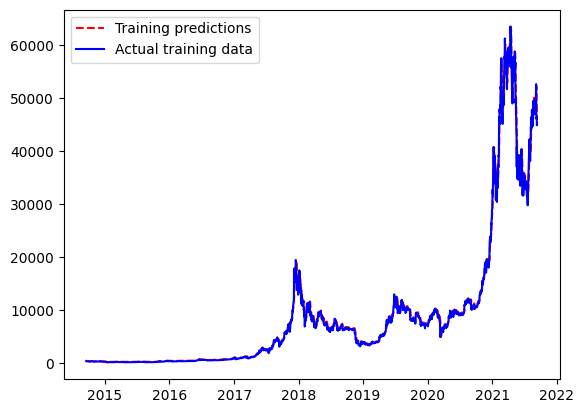

In [ ]:
# #  training predictions versus actual training data plot for comparison
# plt.plot(train_data.iloc[time_steps:].index,train_predict, color = 'red', linestyle = 'dashed', label = 'Training predictions')
# plt.plot(train_data.index,scaler.inverse_transform(np.array(train_data).reshape(-1,1)), color = 'blue', label = 'Actual training data')
# plt.legend()
# plt.show()
# Plotting training predictions versus actual training data for comparison
plt.plot(train_data.iloc[time_steps:].index, train_predict, color='red', linestyle='dashed', label='Training predictions')
plt.plot(train_data.index, scaler.inverse_transform(np.array(train_data).reshape(-1, 1)), color='blue', label='Actual training data')
plt.legend()
plt.show()

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def prepare_data_rf(data, sequence_length):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    data['scaled_close'] = scaler.fit_transform(np.array(data.Close).reshape(-1, 1))

    # Splitting data into 70% training and 30% testing sets
    train_ratio = 0.7
    split_index = int(train_ratio * len(data))

    training_set, test_set = data.iloc[:split_index], data.iloc[split_index:]

    print(f'Training set size: {training_set.shape}')
    print(f'Test set size: {test_set.shape}')

    return training_set.scaled_close.values, test_set.scaled_close.values, scaler

# Generating Sequences for Model Input
def generate_sequences(data_series, seq_length):
    X_values, y_values = [], []
    for i in range(len(data_series) - seq_length):
        X_values.append(data_series[i:(i + seq_length)])
        y_values.append(data_series[i + seq_length])
    return np.array(X_values), np.array(y_values)

# Training the Random Forest Model
def train_rf_model(X_training, y_training):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_training, y_training)
    return rf_model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

def prepare_data_rf(data, sequence_length):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    data['scaled_close'] = scaler.fit_transform(np.array(data.Close).reshape(-1, 1))

    # Splitting data into 70% training and 30% testing sets
    train_ratio = 0.7
    split_index = int(train_ratio * len(data))

    training_set, temp_set = data.iloc[:split_index], data.iloc[split_index:]

    # Further split the temp_set into validation and evaluation sets (50-50 split)
    validation_ratio = 0.5
    validation_index = int(validation_ratio * len(temp_set))

    validation_set, eval_set = temp_set.iloc[:validation_index], temp_set.iloc[validation_index:]

    print(f'Training set size: {training_set.shape}')
    print(f'Validation set size: {validation_set.shape}')
    print(f'Evaluation set size: {eval_set.shape}')

    return training_set.scaled_close.values, validation_set.scaled_close.values, eval_set.scaled_close.values, scaler

# Generate sequences for model input
def generate_sequences(data_series, seq_length):
    X_values, y_values = [], []
    for i in range(len(data_series) - seq_length):
        X_values.append(data_series[i:(i + seq_length)])
        y_values.append(data_series[i + seq_length])
    return np.array(X_values), np.array(y_values)

# Train the Random Forest model
def train_rf_model(X_training, y_training):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_training, y_training)
    return rf_model

# Evaluate the Random Forest model
def assess_rf_model(rf_model, X_validation, y_validation, X_eval, y_eval):
    # Generate predictions
    validation_preds = rf_model.predict(X_validation)
    eval_preds = rf_model.predict(X_eval)

    # Calculate Mean Absolute Error (MAE)
    validation_mae = mean_absolute_error(y_validation, validation_preds)
    eval_mae = mean_absolute_error(y_eval, eval_preds)

    # Output the results
    print(f'Validation MAE: {validation_mae}')
    print(f'Evaluation MAE: {eval_mae}')

cryptos = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']
frequency = 'daily'
sequence_length = 10

for crypto in cryptos:
    try:
        crypto_data = globals()[f'df_{crypto}_{frequency}']
    except KeyError:
        print(f"Data for {crypto} with frequency {frequency} not found.")
        continue

    # Data Preparation
    train_scaled, validation_scaled, eval_scaled, data_scaler = prepare_data_rf(crypto_data, sequence_length)

    # Generate sequences
    X_train, y_train = generate_sequences(train_scaled, sequence_length)
    X_validation, y_validation = generate_sequences(validation_scaled, sequence_length)
    X_eval, y_eval = generate_sequences(eval_scaled, sequence_length)

    # Train the Random Forest Model
    rf_model = train_rf_model(X_train, y_train)

    # Evaluate the Model
    assess_rf_model(rf_model, X_validation, y_validation, X_eval, y_eval)


Training set size: (2552, 7)
Validation set size: (547, 7)
Evaluation set size: (547, 7)
Validation MAE: 0.02183588903320781
Evaluation MAE: 0.04320044089958416
Training set size: (1747, 7)
Validation set size: (375, 7)
Evaluation set size: (375, 7)
Validation MAE: 0.009284198513370229
Evaluation MAE: 0.016166352704736545
Training set size: (2552, 7)
Validation set size: (547, 7)
Evaluation set size: (547, 7)
Validation MAE: 0.009817092142498708
Evaluation MAE: 0.005983037994206428
Training set size: (1747, 7)
Validation set size: (375, 7)
Evaluation set size: (375, 7)
Validation MAE: 0.004696066986435579
Evaluation MAE: 0.005125902286995264
Training set size: (1747, 7)
Validation set size: (375, 7)
Evaluation set size: (375, 7)
Validation MAE: 0.005789025075852697
Evaluation MAE: 0.007372971110887444
Training set size: (1037, 7)
Validation set size: (222, 7)
Evaluation set size: (223, 7)
Validation MAE: 0.0033839305561391858
Evaluation MAE: 0.0045544373056150955
Training set size: (17

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_errors(y_true, y_pred):
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Print the errors
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

# Example usage with evaluation data
calculate_errors(y_eval, rf_model.predict(X_eval))


Mean Absolute Error (MAE): 0.014726283913806771
Mean Squared Error (MSE): 0.0005725823310210546
Root Mean Squared Error (RMSE): 0.023928692630836617


In [ ]:
# After training your model
model.save('lstm_model.h5')



In [ ]:
from google.colab import files

files.download('lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>